#### ЧАСТИНА 1. Збирання даних та перетворення їх у таблицю SQLite 3

In [21]:
import pandas as pd
import sqlite3 as sq

In [22]:
df=pd.read_csv("./healthcare-dataset-stroke-data.csv")
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [23]:
print(f"Розмірність датасету перед очисткою NaN значень {df.shape}")
df.dropna(inplace=True)
print(f"Розмірність датасету після очисткою NaN значень {df.shape}")

Розмірність датасету перед очисткою NaN значень (5110, 12)
Розмірність датасету після очисткою NaN значень (4909, 12)


In [24]:
print(df.columns)
df.drop(['id'],axis=1,inplace=True)
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [25]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [26]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### Частина 1.2. Робота з SQLite 3

In [10]:
table_name="health_care_project"
conn=sq.connect("health_care_project.sqlite")
conn.execute(f"""CREATE TABLE IF NOT EXISTS {table_name} (Gender text, Age real, Hypertension integer,
                Heart_Disease integer,Ever_Maried integer, Work_Type text,Residence_Type text, Avg_Glucose_Level real, BMI real,
                Smoking_Status text, Stroke integer)""")
df.to_sql(table_name,conn, if_exists="replace",index=False)
conn.commit()
conn.close()
    

In [11]:
with sq.connect('health_care_project.sqlite') as con:
    cur = con.cursor()
    cur.execute( """SELECT name FROM sqlite_master  
  WHERE type='table';""")
    result=cur.fetchall()
    print(f"Tables are: {result}")

Tables are: [('health_care_project',)]


In [12]:
with sq.connect('health_care_project.sqlite') as con:
    cur = con.cursor()
    cur.execute( """SELECT * FROM health_care_project""")
    result=cur.fetchall()
    for i in result:
        print(i)

('Male', 67.0, 0, 1, 'Yes', 'Private', 'Urban', 228.69, 36.6, 'formerly smoked', 1)
('Male', 80.0, 0, 1, 'Yes', 'Private', 'Rural', 105.92, 32.5, 'never smoked', 1)
('Female', 49.0, 0, 0, 'Yes', 'Private', 'Urban', 171.23, 34.4, 'smokes', 1)
('Female', 79.0, 1, 0, 'Yes', 'Self-employed', 'Rural', 174.12, 24.0, 'never smoked', 1)
('Male', 81.0, 0, 0, 'Yes', 'Private', 'Urban', 186.21, 29.0, 'formerly smoked', 1)
('Male', 74.0, 1, 1, 'Yes', 'Private', 'Rural', 70.09, 27.4, 'never smoked', 1)
('Female', 69.0, 0, 0, 'No', 'Private', 'Urban', 94.39, 22.8, 'never smoked', 1)
('Female', 78.0, 0, 0, 'Yes', 'Private', 'Urban', 58.57, 24.2, 'Unknown', 1)
('Female', 81.0, 1, 0, 'Yes', 'Private', 'Rural', 80.43, 29.7, 'never smoked', 1)
('Female', 61.0, 0, 1, 'Yes', 'Govt_job', 'Rural', 120.46, 36.8, 'smokes', 1)
('Female', 54.0, 0, 0, 'Yes', 'Private', 'Urban', 104.51, 27.3, 'smokes', 1)
('Female', 79.0, 0, 1, 'Yes', 'Private', 'Urban', 214.09, 28.2, 'never smoked', 1)
('Female', 50.0, 1, 0, 'Yes

In [13]:
with sq.connect('health_care_project.sqlite') as con:
    cur=con.cursor()
    cur.execute(""" SELECT * from health_care_project WHERE bmi > 25 AND Smoking_Status = 'smokes'""")
    result=cur.fetchall()
    for i in result:
        print(i)

('Female', 49.0, 0, 0, 'Yes', 'Private', 'Urban', 171.23, 34.4, 'smokes', 1)
('Female', 61.0, 0, 1, 'Yes', 'Govt_job', 'Rural', 120.46, 36.8, 'smokes', 1)
('Female', 54.0, 0, 0, 'Yes', 'Private', 'Urban', 104.51, 27.3, 'smokes', 1)
('Male', 64.0, 0, 1, 'Yes', 'Private', 'Urban', 191.61, 37.5, 'smokes', 1)
('Male', 75.0, 1, 0, 'Yes', 'Private', 'Urban', 221.29, 25.8, 'smokes', 1)
('Male', 69.0, 0, 1, 'Yes', 'Self-employed', 'Urban', 195.23, 28.3, 'smokes', 1)
('Male', 57.0, 1, 0, 'Yes', 'Private', 'Urban', 212.08, 44.2, 'smokes', 1)
('Male', 82.0, 0, 1, 'Yes', 'Private', 'Urban', 144.9, 26.4, 'smokes', 1)
('Female', 39.0, 1, 0, 'Yes', 'Private', 'Rural', 58.09, 39.2, 'smokes', 1)
('Female', 67.0, 1, 0, 'Yes', 'Self-employed', 'Rural', 61.94, 25.3, 'smokes', 1)
('Male', 54.0, 0, 0, 'Yes', 'Private', 'Rural', 96.97, 29.1, 'smokes', 1)
('Male', 61.0, 0, 1, 'Yes', 'Private', 'Rural', 111.81, 27.3, 'smokes', 1)
('Male', 58.0, 0, 1, 'Yes', 'Private', 'Rural', 240.59, 31.4, 'smokes', 1)
('Fema

#### ЧАСТИНА 2. Візуалізація


Перейдемо до Power BI


#### ЧАСТИНА 3. Використання ML 

In [27]:
from sklearn.tree         import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble     import RandomForestRegressor
from sklearn.ensemble     import RandomForestClassifier
from xgboost              import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [29]:
y=df["stroke"]
X=df.drop('stroke',axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:

ohe=OneHotEncoder(handle_unknown="ignore")
categorical_processing=Pipeline(steps=[('ohe',ohe)])
preprocessing = ColumnTransformer(transformers=[('categorical', categorical_processing, ['gender','ever_married', 'work_type','Residence_type','smoking_status'])],
                                  remainder='passthrough')
x_train=preprocessing.fit_transform(x_train)

x_test = preprocessing.transform(x_test)


In [31]:
print(X)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
5       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
5104  Female  13.0             0              0           No       children   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bmi   smok

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
y_predicted_lin_reg=lin_reg.predict(x_test)
print("R squared: ",metrics.r2_score(y_test,y_predicted_lin_reg))
print("Mean absolute error: ",metrics.mean_absolute_error(y_test,y_predicted_lin_reg))
print("Mean squared error: ",metrics.mean_squared_error(y_test,y_predicted_lin_reg))
print("Accuracy score: ",metrics.accuracy_score(y_test,y_predicted_lin_reg.round()))


R squared:  0.07301658181654302
Mean absolute error:  0.08726248266865577
Mean squared error:  0.0388135206382849
Accuracy score:  0.9562118126272913


In [33]:
log_reg=LogisticRegression()
log_reg.fit(x_train, y_train)
y_predicted_log_reg=log_reg.predict(x_test)
print("R squared: ",metrics.r2_score(y_test,y_predicted_log_reg))
print("Mean absolute error: ",metrics.mean_absolute_error(y_test,y_predicted_log_reg))
print("Mean squared error: ",metrics.mean_squared_error(y_test,y_predicted_log_reg))
print("Accuracy score: ",metrics.accuracy_score(y_test,y_predicted_lin_reg.round()))

R squared:  -0.045793397231096655
Mean absolute error:  0.04378818737270876
Mean squared error:  0.04378818737270876
Accuracy score:  0.9562118126272913


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
rand_for_reg=RandomForestRegressor()
rand_for_reg.fit(x_train,y_train)
y_predicted_rand_for_reg=rand_for_reg.predict(x_test)
print("R squared: ",metrics.r2_score(y_test,y_predicted_rand_for_reg))
print("Mean absolute: ",metrics.mean_absolute_error(y_test,y_predicted_rand_for_reg))
print("Mean squared: ",metrics.mean_squared_error(y_test,y_predicted_rand_for_reg))
print("Accuracy score: ",metrics.accuracy_score(y_test,y_predicted_rand_for_reg.round()))

R squared:  -0.01957073581494395
Mean absolute:  0.08340122199592669
Mean squared:  0.04269022403258656
Accuracy score:  0.9511201629327902


In [35]:
rand_for_class=RandomForestClassifier(max_depth=5, random_state=0)
rand_for_class.fit(x_train,y_train)
y_predicted_rand_for_class=rand_for_class.predict(x_test)
print("R squared: ",metrics.r2_score(y_test,y_predicted_rand_for_class))
print("Mean absolute: ",metrics.mean_absolute_error(y_test,y_predicted_rand_for_class))
print("Mean squared: ",metrics.mean_squared_error(y_test,y_predicted_rand_for_class))
print("Accuracy score: ",metrics.accuracy_score(y_test,y_predicted_rand_for_class.round()))

R squared:  -0.045793397231096655
Mean absolute:  0.04378818737270876
Mean squared:  0.04378818737270876
Accuracy score:  0.9562118126272913


In [36]:
xgb_class=XGBClassifier()
xgb_class.fit(x_train,y_train)
y_predicted_xgb_class=xgb_class.predict(y_test)
print("R squared: ",metrics.r2_score(y_test,y_predicted_xgb_class))
print("Mean absolute: ",metrics.mean_absolute_error(y_test,y_predicted_xgb_class))
print("Mean squared: ",metrics.mean_squared_error(y_test,y_predicted_xgb_class))
print("Accuracy score: ",metrics.accuracy_score(y_test,y_predicted_xgb_class.round()))

R squared:  -0.045793397231096655
Mean absolute:  0.04378818737270876
Mean squared:  0.04378818737270876
Accuracy score:  0.9562118126272913


Best depth:  1 
Mean squared:  0.03915722773107235 
R_squared:  0.06480782439164356 
Accurasy score:  0.9562118126272913


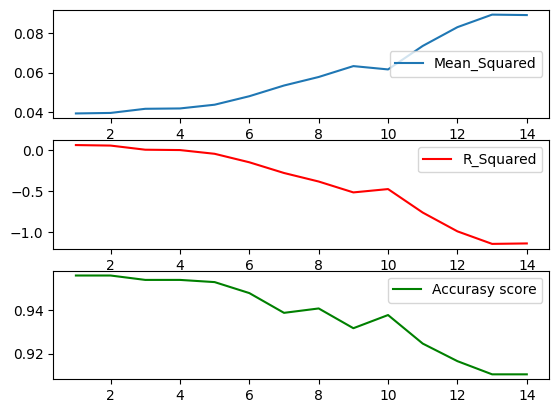

In [20]:
depth_range=range(1,15)
mean_squared_list=[]
r_squared_list=[]
accur_score_list=[]
for depth in depth_range:  
    df_model_DTR=DecisionTreeRegressor(random_state=0,max_depth=depth)
    df_model_DTR.fit(x_train,y_train)
    y_predicted_DTR=df_model_DTR.predict(x_test)
    mean_squared=metrics.mean_squared_error(y_test,y_predicted_DTR)
    accur_score=metrics.accuracy_score(y_test,y_predicted_DTR.round())
    r_squared=metrics.r2_score(y_test,y_predicted_DTR)
    r_squared_list.append(r_squared)
    mean_squared_list.append(mean_squared)
    accur_score_list.append(accur_score)
best_depth=depth_range[mean_squared_list.index(min(mean_squared_list))]

print("Best depth: ",best_depth,"\nMean squared: ", min(mean_squared_list),"\nR_squared: ", max(r_squared_list),"\nAccurasy score: ",max(accur_score_list))
plt.subplot(3,1,1)
plt.plot(depth_range,mean_squared_list,label="Mean_Squared")
plt.legend(loc="right")
plt.subplot(3,1,2)
plt.plot(depth_range,r_squared_list,color="r",label="R_Squared")
plt.legend(loc="upper right")
plt.subplot(3,1,3)
plt.plot(depth_range,accur_score_list,color="g",label="Accurasy score")
plt.legend(loc="upper right")

In [42]:
print(X.columns)
print(X['gender'].unique())
print(X['ever_married'].unique())
print(X['work_type'].unique())
print(X['Residence_type'].unique())
print(X['smoking_status'].unique())


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')
['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [40]:

user_dict={"gender":["female"],   #['Male' 'Female' 'Other']
           "age":[78],
           "hypertension":[0], #['0','1']
           "heart_disease":[0], #['0','1']
           'ever_married':["Yes"], #['Yes','No']
           "work_type":["Self-employed"], #['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
           "Residence_type":['Rural'], #['Urban' 'Rural']
           'avg_glucose_level':[120], #Нормально - менше 114, ПередДіабетний стан - 114-140, Діабетний стан - 140
           'bmi':[25], #норма 18.5 - 25, надмірна вага 30-35, ожиріння 30+
           "smoking_status":["never smoked"]} #['formerly smoked' 'never smoked' 'smokes' 'Unknown']
user_df=pd.DataFrame(user_dict)
user_df
x_user_enc=preprocessing.transform(user_df)


In [41]:
y_predicted_user_rand_for_class=rand_for_class.predict(x_user_enc)
y_predicted_user_lin_reg=lin_reg.predict(x_user_enc)
y_predicted_user_log_reg=log_reg.predict(x_user_enc)
y_predicted_user_rand_for_reg=rand_for_reg.predict(x_user_enc)
df_model_DTR=DecisionTreeRegressor(random_state=0,max_depth=10)
df_model_DTR.fit(x_train,y_train)
y_predicted_user_DTR=df_model_DTR.predict(x_user_enc)
y_predicted_user_xgb_class=xgb_class.predict(x_user_enc)
print("Результат LinearRegression: ",y_predicted_user_lin_reg)
print("Результат LogisticRegression: ",y_predicted_user_log_reg)
print("Результат RandomForestRegressor: ",y_predicted_user_rand_for_reg)
print("Результат DecisionTreeRegressor: ",y_predicted_user_DTR)
print("Результат RandomForestClassifier:", y_predicted_user_rand_for_class)
print("Результат XGB:", y_predicted_user_xgb_class)

Результат LinearRegression:  [0.10235517]
Результат LogisticRegression:  [0]
Результат RandomForestRegressor:  [0.17]
Результат DecisionTreeRegressor:  [0.]
Результат RandomForestClassifier: [0]
Результат XGB: [0]
